In [1]:
# Import Libraries and Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

dataset = pd.read_excel("HousePricePrediction.xlsx")

In [2]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
dataset.shape

(2919, 13)

In [4]:
# Data Preprocessing
obj = (dataset.dtypes == "object")
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int = (dataset.dtypes == "int")
int_cols = list(int[int].index)
print("Integer variables:", len(int_cols))

fl = (dataset.dtypes == "float")
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


Text(0.5, 1.0, 'Relationship between the features of the data')

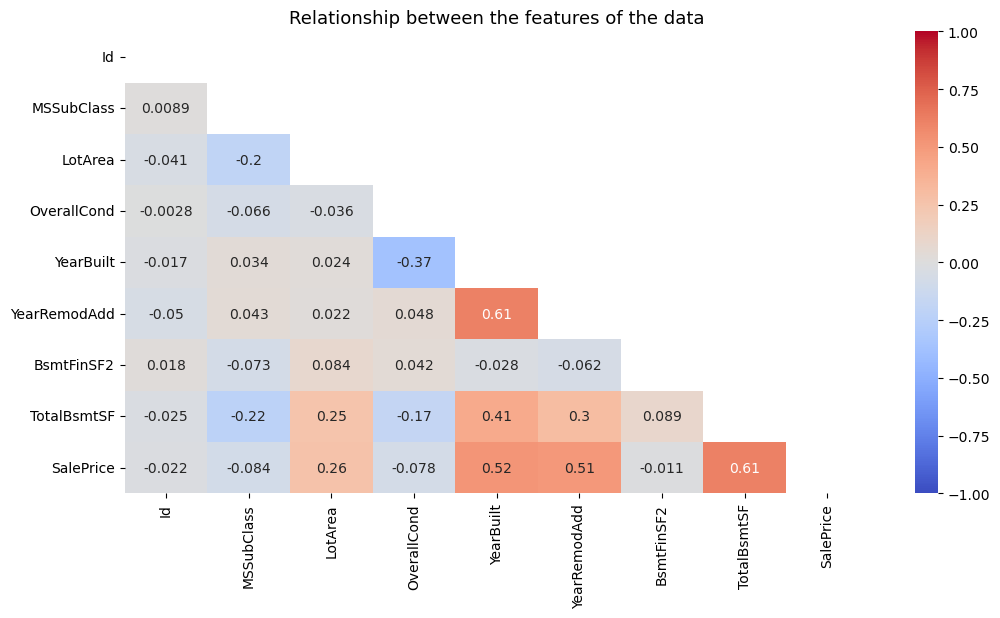

In [25]:
# Exploratory Data Analysis
warnings.simplefilter(action='ignore', category=FutureWarning)

# Heat Map
plt.figure(1, figsize=(12,6))
mask = np.triu(np.ones_like(dataset.corr()))
sns.heatmap(dataset.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, mask=mask)
plt.title('Relationship between the features of the data', fontsize=13)


<Axes: title={'center': 'No. of Unique values of Categorical Values'}>

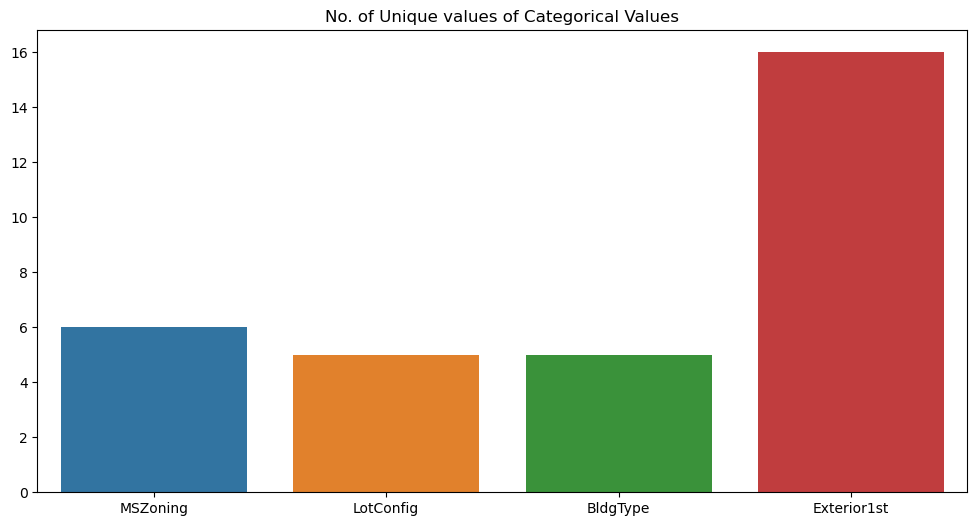

In [5]:
# Bar Plot

unique_values = []

for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(12,6))
plt.title('No. of Unique values of Categorical Values')
sns.barplot(x=object_cols, y=unique_values)

/var/folders/z6/wybry3s942q8fzn2gfd4kr940000gn/T/ipykernel_1717/3710886687.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


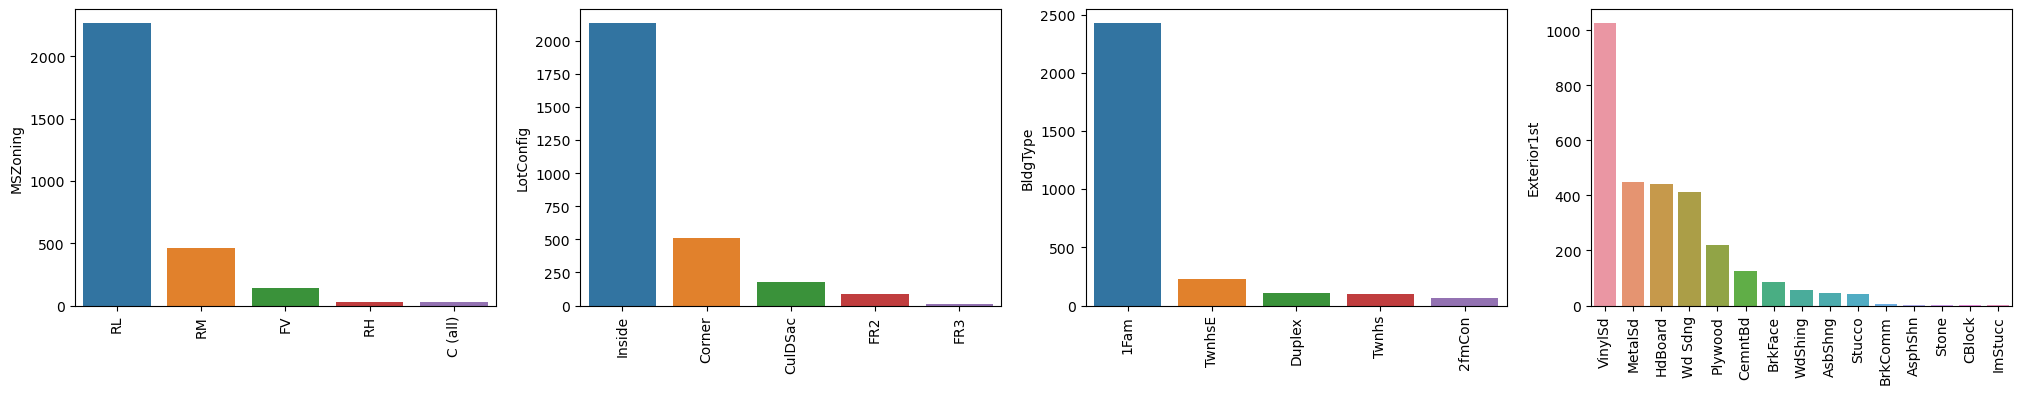

In [45]:

plt.figure(figsize=(25, 50))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [6]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

Observations: There are null values in the dataset